In [393]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from collections import Counter

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [513]:
# Importing the datasets

datasets = pd.read_csv('Resources/final_totals.csv')
X = datasets.iloc[:, [9,12]]
Y = datasets.iloc[:, 5]
datasets.head()

,team,season,team_payroll,avg_payroll,diff,w,l,ws_win,playoffs,warp,...,pitched_home_runs,pitched_base_on_balls,pitched_hits,pitcher_average,pitched_strike_outs,saves,holds,earned_runs,whip,walks_per_9_inn
0,Red Sox,2007,147568833,85747487,61821346,96,66,1,1,50.42,...,155,433,1336,2.8540,1079,44,73,601,14.930,51.19
1,Yankees,2009,203275189,92957049,110318140,103,59,1,1,26.40,...,44,140,391,1.5930,358,44,15,181,9.240,44.82
2,Red Sox,2013,150655000,106658387,43996613,97,65,1,1,39.34,...,26,66,199,1.1010,266,29,63,70,5.650,14.49
3,Blue Jays,2001,76322999,67120750,9202249,80,82,0,0,15.39,...,141,350,1193,2.1740,754,1,0,552,11.585,42.16
4,Cubs,2016,171611832,130290910,41320922,103,59,1,1,50.80,...,88,282,745,1.8965,788,2,36,285,10.355,34.97


In [514]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [515]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [516]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [517]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

In [518]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)


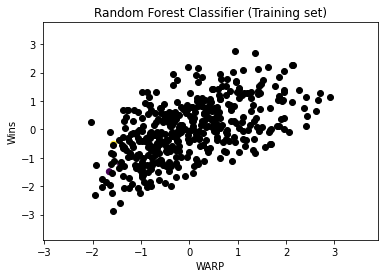

In [519]:
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'white')) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('black', 'black'))(i), label = j)
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('WARP')
plt.ylabel('Wins')
#plt.legend()
plt.show()

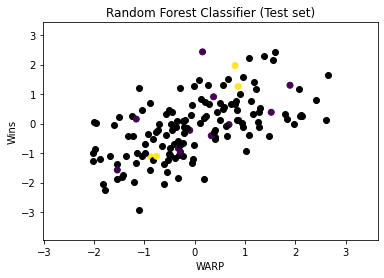

In [520]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('black', 'black'))(i), label = j)
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('WARP')
plt.ylabel('Wins')
#plt.legend()
plt.show()

In [521]:
y_pred = classifier.predict(X_Test)
balanced_accuracy_score(Y_Test, y_pred)

C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.06732874968169086

In [522]:
print(classification_report_imbalanced(Y_Test, y_pred))

C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   pre       rec       spe        f1       geo       iba       sup

         43       0.00      0.00      1.00      0.00      0.00      0.00         1
         47       0.50      1.00      0.99      0.67      1.00      0.99         1
         51       0.00      0.00      1.00      0.00      0.00      0.00         1
         55       0.00      0.00      1.00      0.00      0.00      0.00         3
         56       0.50      1.00      0.99      0.67      1.00      0.99         1
         57       0.00      0.00      0.99      0.00      0.00      0.00         0
         58       0.00      0.00      0.99      0.00      0.00      0.00         1
         61       0.00      0.00      0.99      0.00      0.00      0.00         1
         62       0.00      0.00      1.00      0.00      0.00      0.00         2
         63       0.00      0.00      0.99      0.00      0.00      0.00         2
         64       0.00      0.00      0.98      0.00      0.00      0.00         1
   

In [523]:
features_rank = sorted(zip(classifier.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

warp: (0.5228912886141871)
runs: (0.47710871138581296)
